Training data loaded successfully.
First few rows of the training dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     

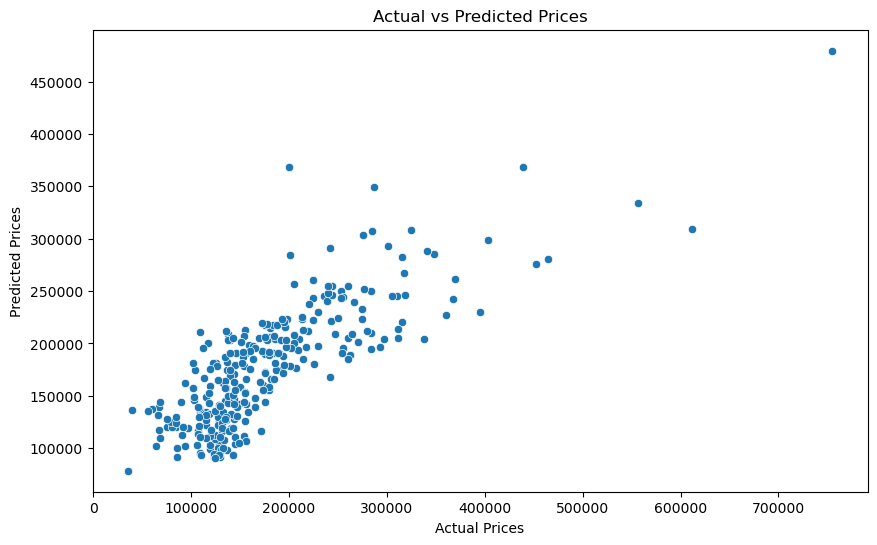

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the training data
try:
    train_df = pd.read_csv('train.csv')
    print("Training data loaded successfully.")
except FileNotFoundError:
    print("Error: 'train.csv' file not found. Please check the file path and try again.")
    exit()

# Display the first few rows of the dataset
print("First few rows of the training dataset:")
print(train_df.head())

# Check for missing values
print("Checking for missing values in the training dataset:")
print(train_df.isnull().sum())

# Separate numeric and non-numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
non_numeric_cols = train_df.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the median
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())

# Fill missing values for non-numeric columns with the mode
train_df[non_numeric_cols] = train_df[non_numeric_cols].fillna(train_df[non_numeric_cols].mode().iloc[0])

# Verify missing values have been handled
print("Missing values after handling:")
print(train_df.isnull().sum())

# Select the features for the model (square footage, number of bedrooms, number of bathrooms)
# Assuming GrLivArea represents square footage, BedroomAbvGr represents the number of bedrooms,
# and FullBath + HalfBath represent the number of bathrooms
train_df['TotalBathrooms'] = train_df['FullBath'] + train_df['HalfBath'] * 0.5
X = train_df[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]
y = train_df['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print("Model Performance:")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Load the test data
try:
    test_df = pd.read_csv('test.csv')
    print("Test data loaded successfully.")
except FileNotFoundError:
    print("Error: 'test.csv' file not found. Please check the file path and try again.")
    exit()

# Prepare the test data
test_df['TotalBathrooms'] = test_df['FullBath'] + test_df['HalfBath'] * 0.5

# Separate numeric and non-numeric columns
numeric_cols_test = test_df.select_dtypes(include=[np.number]).columns
non_numeric_cols_test = test_df.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the median
test_df[numeric_cols_test] = test_df[numeric_cols_test].fillna(test_df[numeric_cols_test].median())

# Fill missing values for non-numeric columns with the mode
test_df[non_numeric_cols_test] = test_df[non_numeric_cols_test].fillna(test_df[non_numeric_cols_test].mode().iloc[0])

X_test = test_df[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]

# Predict on the test data
test_predictions = model.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
output.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")

# Optional: Visualize the performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
